In [199]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [200]:
df = pd.read_pickle('data.pickle')

In [201]:
df.head()

,field1,field2,field3,field4
created_at,,,,
2019-07-18 22:20:00,25.850000,63.000000,27.700000,56.000000
2019-07-18 22:25:00,25.900000,63.000000,27.700000,55.666667
2019-07-18 22:30:00,25.900000,62.000000,27.650000,55.000000
2019-07-18 22:35:00,25.866667,62.333333,27.666667,54.333333
2019-07-18 22:40:00,25.900000,62.000000,27.700000,54.500000


In [202]:
df['time'] = df.index.hour+df.index.minute/60+df.index.second/3600

In [203]:
df.corr()

,field1,field2,field3,field4,time
field1,1.000000,0.505245,0.891515,0.291908,0.130069
field2,0.505245,1.000000,0.436864,0.740693,0.105094
field3,0.891515,0.436864,1.000000,0.153063,0.083441
field4,0.291908,0.740693,0.153063,1.000000,0.198319
time,0.130069,0.105094,0.083441,0.198319,1.000000


In [204]:
df2=pd.DataFrame([])
for col in df.columns:
    for t in range(0,250,25):
        df2[col+'_diff_'+str(t)] = df[col].shift(-t)
print(df2.shape)

(4260, 50)


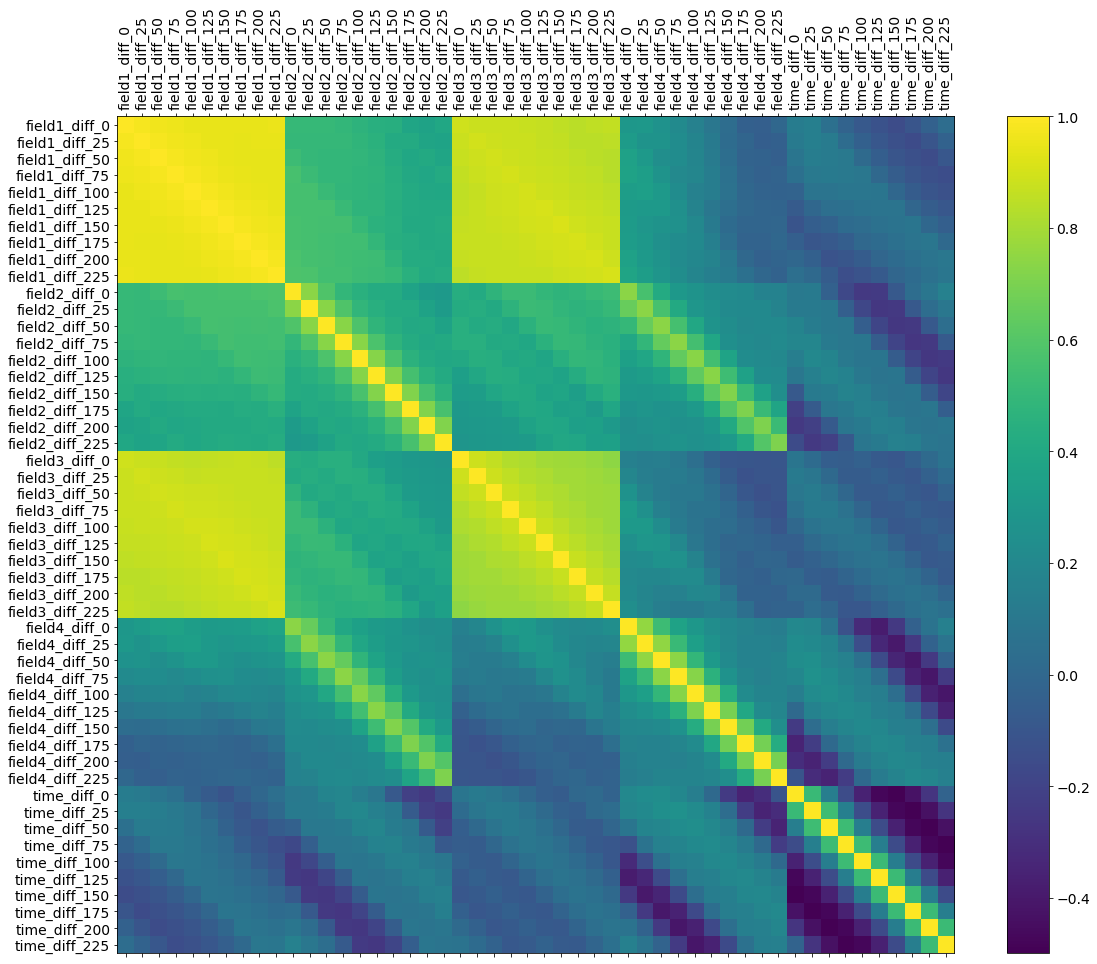

In [205]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=90)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [206]:
df.shape

(4260, 5)

In [207]:
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D  

rcParams['figure.figsize'] = 15, 7

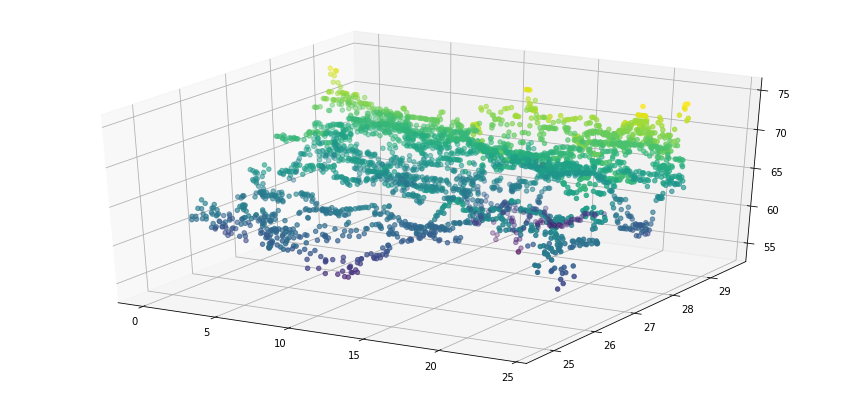

In [208]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.time,df.field1,df.field2,c=df.field2)


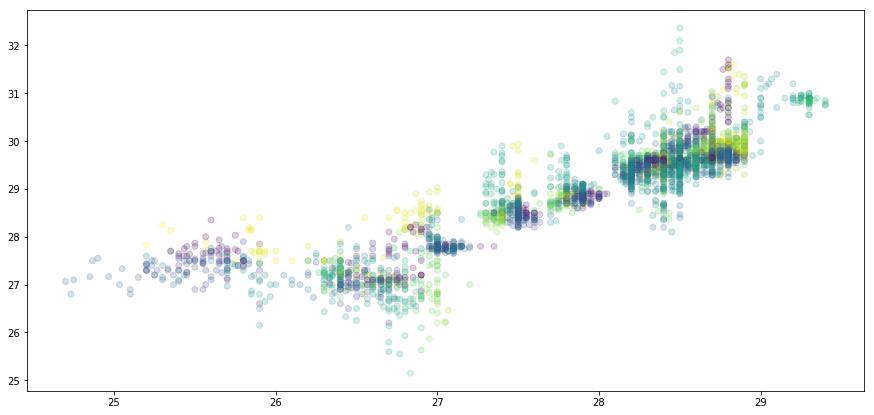

In [209]:
plt.scatter(df.field1,df.field3,c=df.time,alpha=.2)

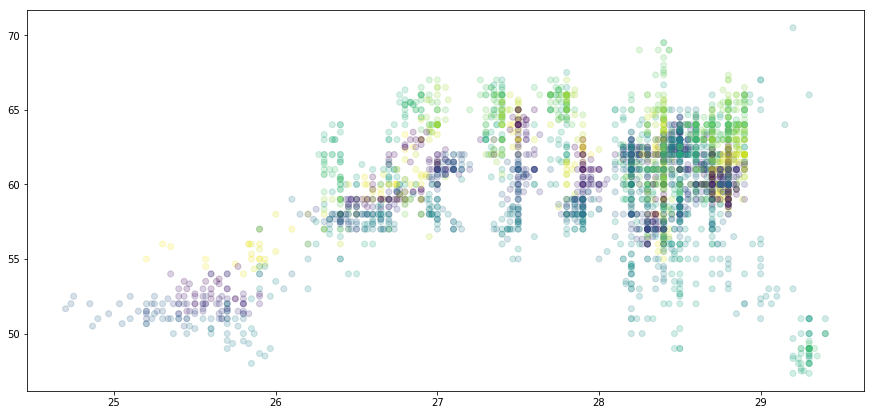

In [210]:
plt.scatter(df.field1,df.field4,c=df.time,alpha=.2)

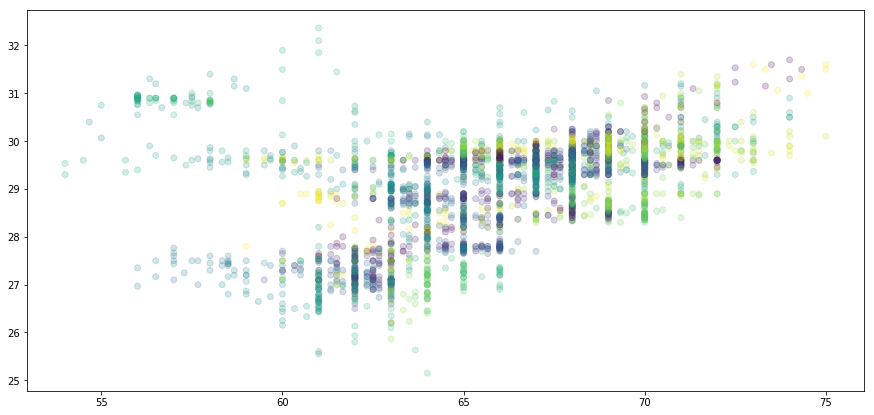

In [211]:
plt.scatter(df.field2,df.field3,c=df.time,alpha=.2)

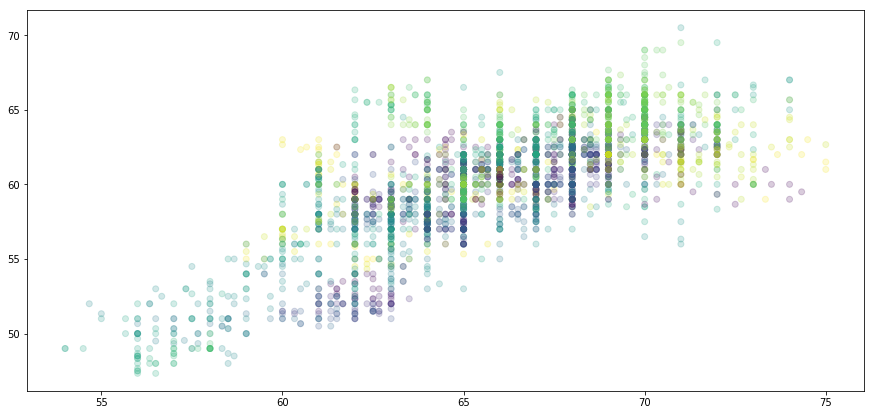

In [212]:
plt.scatter(df.field2,df.field4,c=df.time,alpha=.2)

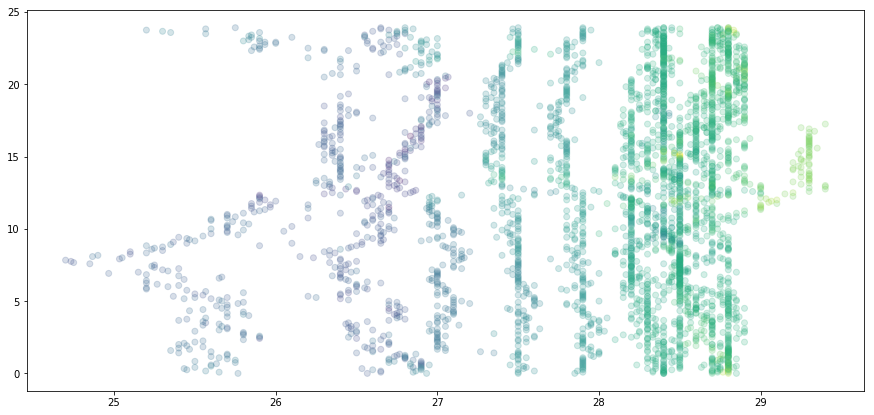

In [213]:
plt.scatter(df.field1,df.time,c=df.field3,alpha=.2)

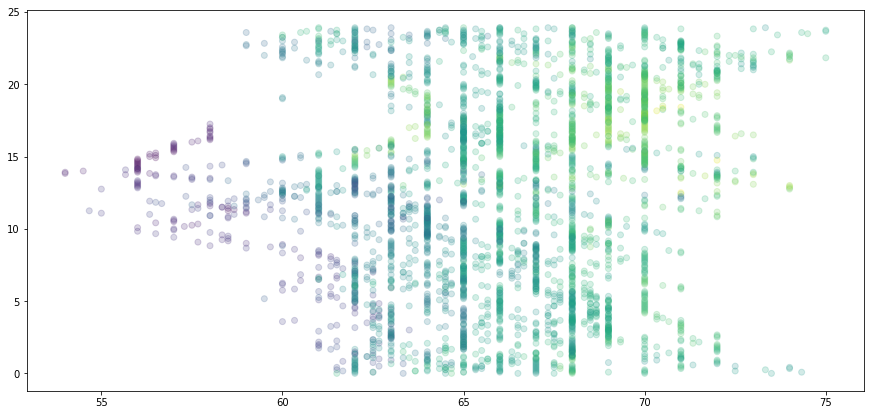

In [214]:
plt.scatter(df.field2,df.time,c=df.field4,alpha=.2)

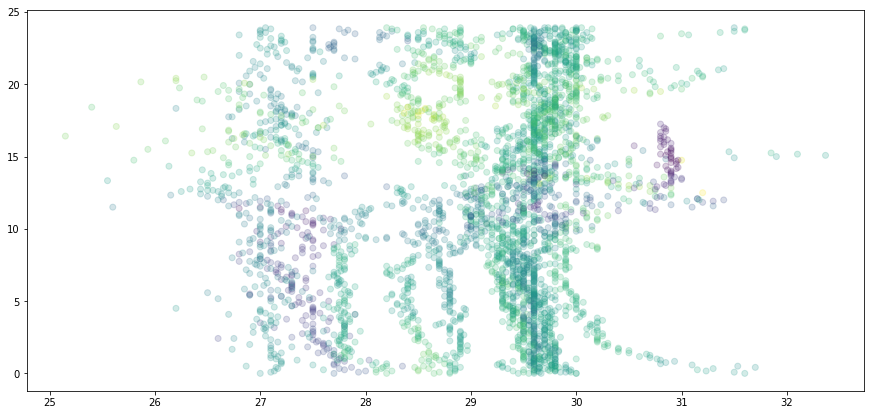

In [215]:
plt.scatter(df.field3,df.time,c=df.field4,alpha=.2)

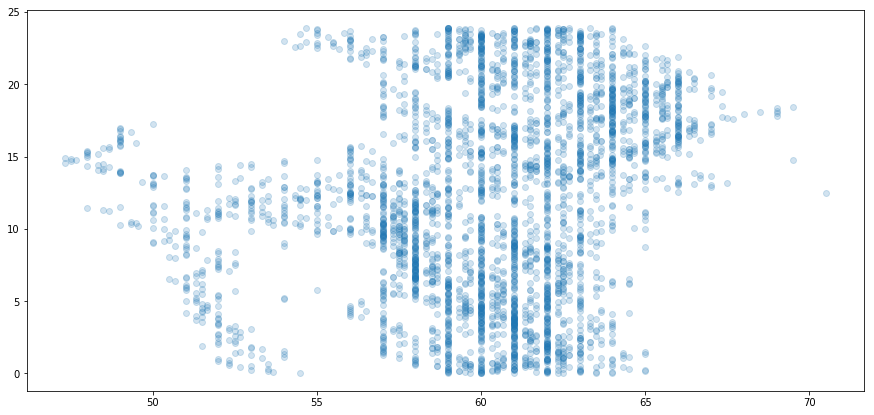

In [216]:
plt.scatter(df.field4,df.time,alpha=.2)

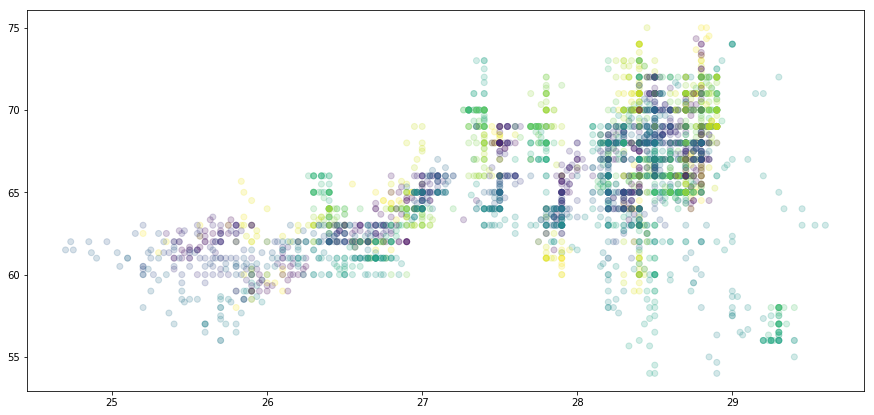

In [217]:
plt.scatter(df.field1,df.field2,c=df.time,alpha=.2)

In [431]:
from sklearn.linear_model import LinearRegression

In [432]:
df = pd.read_pickle('data.pickle')
df['time'] = df.index.hour
df = pd.concat([df,pd.get_dummies(df['time'])],axis=1)

In [433]:
df = df[df.index >= '2019-07-22 00:00:00']

In [434]:
df.drop('time',axis=1,inplace=True)

In [435]:
df.drop(0,axis=1,inplace=True)

In [436]:
dfx = df.copy()
cols = dfx.columns
for col in cols[:4]:
    dfx[col] = dfx[col].interpolate(method='polynomial', order=2)
    dfx[str(col)+'_t10'] = df[col].shift(10)
dfx=dfx.dropna(axis=0)
cols = dfx.columns
cols

Index([    'field1',     'field2',     'field3',     'field4',            1,
                  2,            3,            4,            5,            6,
                  7,            8,            9,           10,           11,
                 12,           13,           14,           15,           16,
                 17,           18,           19,           20,           21,
                 22,           23, 'field1_t10', 'field2_t10', 'field3_t10',
       'field4_t10'],
      dtype='object')

In [437]:
for col in cols[:4]:
    cols2 = list(cols)
    cols2.remove(col)
    print(cols2)
    model = LinearRegression()
    model.fit(dfx[cols2].values, dfx[str(col)].values)
    dfx[str(col)+'_pred'] = model.predict(dfx[cols2].values)

['field2', 'field3', 'field4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']
['field1', 'field3', 'field4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']
['field1', 'field2', 'field4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']
['field1', 'field2', 'field3', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']


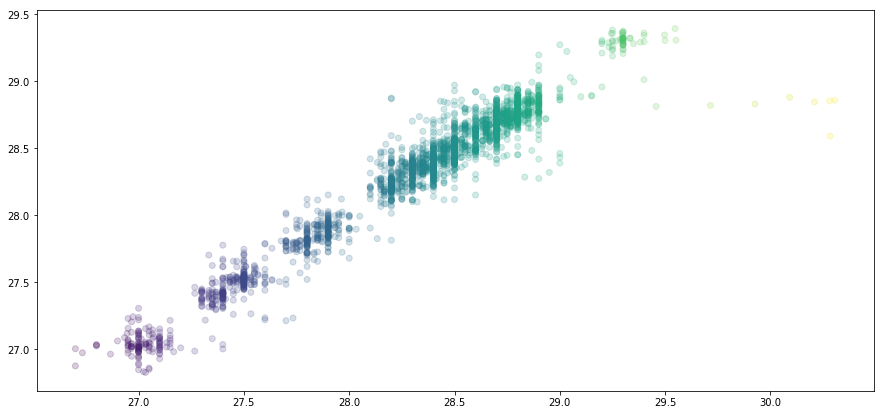

In [438]:
plt.scatter(dfx.field1,dfx.field1_pred,c=dfx.field1,alpha=.2)

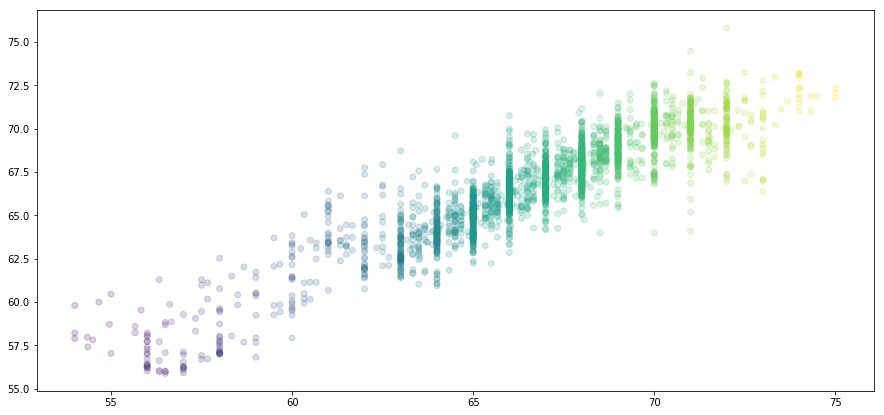

In [439]:
plt.scatter(dfx.field2,dfx.field2_pred,c=dfx.field2,alpha=.2)

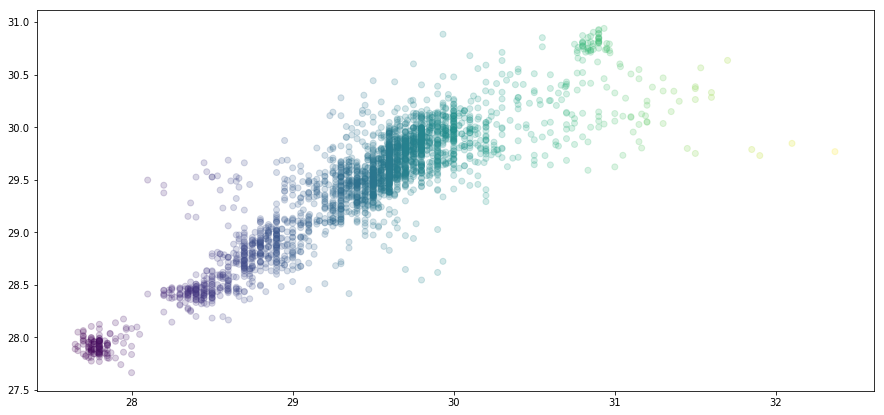

In [440]:
plt.scatter(dfx.field3,dfx.field3_pred,c=dfx.field3,alpha=.2)

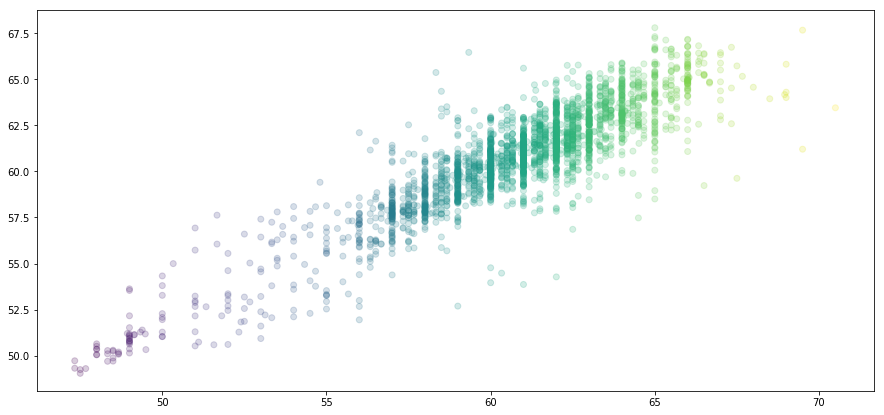

In [441]:
plt.scatter(dfx.field4,dfx.field4_pred,c=dfx.field4,alpha=.2)

In [442]:
print(model.coef_)

[ 7.90754983e-01  5.05114835e-01 -5.30851669e-01  3.43608196e-01
 -1.60593351e-01 -3.74495376e-01 -5.00335927e-01 -6.76824308e-02
  2.53306494e-01 -1.26947955e-01 -2.99694404e-01 -7.63353739e-01
 -6.77472715e-01 -4.69750433e-01  7.70666178e-03  9.17560835e-01
 -3.36195071e-04  1.05892251e+00  9.88289601e-01  1.03504287e+00
  6.83208247e-01  5.92182035e-01  1.36899652e-01 -3.89007087e-01
 -6.56341285e-02  4.72812485e-01 -5.97795113e-01 -1.40526665e-01
 -3.83460804e-01  5.28312902e-01]


In [443]:
dfx

,field1,field2,field3,field4,1,2,3,4,5,6,...,22,23,field1_t10,field2_t10,field3_t10,field4_t10,field1_pred,field2_pred,field3_pred,field4_pred
created_at,,,,,,,,,,,,,,,,,,,,,
2019-07-22 00:50:00,26.733333,63.666667,27.950000,62.000000,0,0,0,0,0,0,...,0,0,26.933333,64.666667,28.200000,63.500000,26.973562,65.387437,27.859754,61.648672
2019-07-22 00:55:00,26.700000,64.000000,27.733333,61.666667,0,0,0,0,0,0,...,0,0,26.850000,65.000000,28.100000,63.500000,26.875303,65.205253,27.808617,61.947023
2019-07-22 01:00:00,26.700000,64.333333,27.800000,62.000000,1,0,0,0,0,0,...,0,0,26.866667,63.666667,28.250000,63.000000,27.003633,64.521383,27.873853,62.279343
2019-07-22 01:05:00,26.800000,63.500000,27.800000,62.500000,1,0,0,0,0,0,...,0,0,26.900000,64.500000,28.100000,63.000000,27.033040,65.239872,27.770920,61.857976
2019-07-22 01:10:00,26.800000,65.000000,27.850000,62.500000,1,0,0,0,0,0,...,0,0,26.900000,64.666667,28.150000,63.000000,27.032885,65.399668,27.881095,62.546512
2019-07-22 01:15:00,26.800000,66.000000,27.766667,62.666667,1,0,0,0,0,0,...,0,0,26.900000,64.500000,28.166667,62.666667,27.024177,65.261702,27.960510,62.936790
2019-07-22 01:20:00,26.866667,65.333333,27.700000,62.500000,1,0,0,0,0,0,...,0,0,26.833333,64.000000,28.200000,63.000000,26.963110,64.759294,27.972768,62.961592
2019-07-22 01:25:00,27.350000,64.500000,27.800000,63.000000,1,0,0,0,0,0,...,0,0,26.950000,64.000000,28.066667,61.666667,27.078629,65.001807,28.124835,62.146745
2019-07-22 01:30:00,27.266667,63.333333,27.800000,63.000000,1,0,0,0,0,0,...,0,0,26.833333,63.000000,28.200000,61.500000,26.986089,64.430881,28.082215,61.562637


In [444]:
dfz = dfx[['field1','field1_pred','field2','field2_pred','field3','field3_pred','field4','field4_pred']]
for i in range(1,5):
    dfz['field'+str(i)+'_diff'] = (dfz['field'+str(i)] - dfz['field'+str(i)+'_pred'])
    dfz['field'+str(i)+'_diff'] = (dfz['field'+str(i)+'_diff'] - dfz['field'+str(i)+'_diff'].mean()) / (dfz['field'+str(i)+'_diff'].max() - dfz['field'+str(i)+'_diff'].min())
dfz

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,field1,field1_pred,field2,field2_pred,field3,field3_pred,field4,field4_pred,field1_diff,field2_diff,field3_diff,field4_diff
created_at,,,,,,,,,,,,
2019-07-22 00:50:00,26.733333,26.973562,63.666667,65.387437,27.950000,27.859754,62.000000,61.648672,-0.101513,-0.135227,0.022584,0.022785
2019-07-22 00:55:00,26.700000,26.875303,64.000000,65.205253,27.733333,27.808617,61.666667,61.947023,-0.074078,-0.094715,-0.018840,-0.018183
2019-07-22 01:00:00,26.700000,27.003633,64.333333,64.521383,27.800000,27.873853,62.000000,62.279343,-0.128306,-0.014778,-0.018482,-0.018117
2019-07-22 01:05:00,26.800000,27.033040,63.500000,65.239872,27.800000,27.770920,62.500000,61.857976,-0.098476,-0.136728,0.007277,0.041638
2019-07-22 01:10:00,26.800000,27.032885,65.000000,65.399668,27.850000,27.881095,62.500000,62.546512,-0.098410,-0.031408,-0.007782,-0.003017
2019-07-22 01:15:00,26.800000,27.024177,66.000000,65.261702,27.766667,27.960510,62.666667,62.936790,-0.094730,0.058019,-0.048509,-0.017519
2019-07-22 01:20:00,26.866667,26.963110,65.333333,64.759294,27.700000,27.972768,62.500000,62.961592,-0.040754,0.045111,-0.068259,-0.029937
2019-07-22 01:25:00,27.350000,27.078629,64.500000,65.001807,27.800000,28.124835,63.000000,62.146745,0.114673,-0.039435,-0.081289,0.055338
2019-07-22 01:30:00,27.266667,26.986089,63.333333,64.430881,27.800000,28.082215,63.000000,61.562637,0.118563,-0.086251,-0.070623,0.093220


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


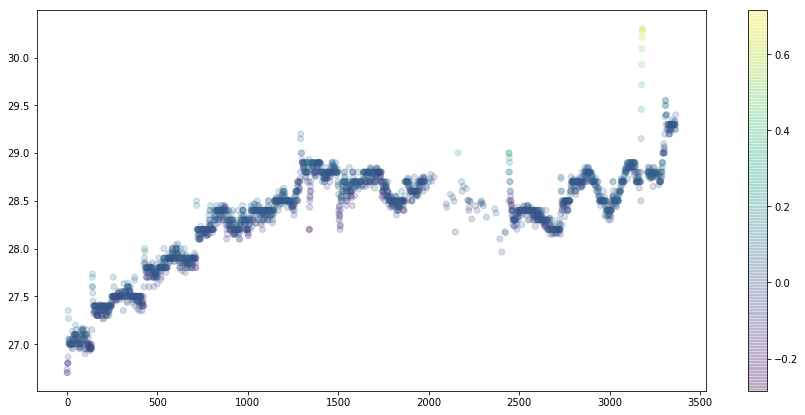

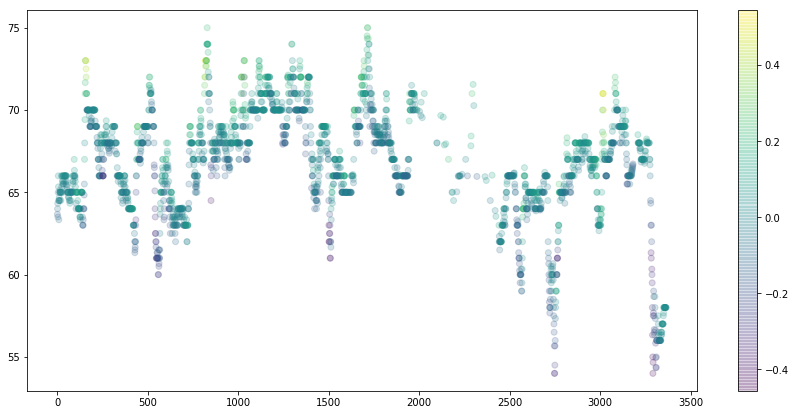

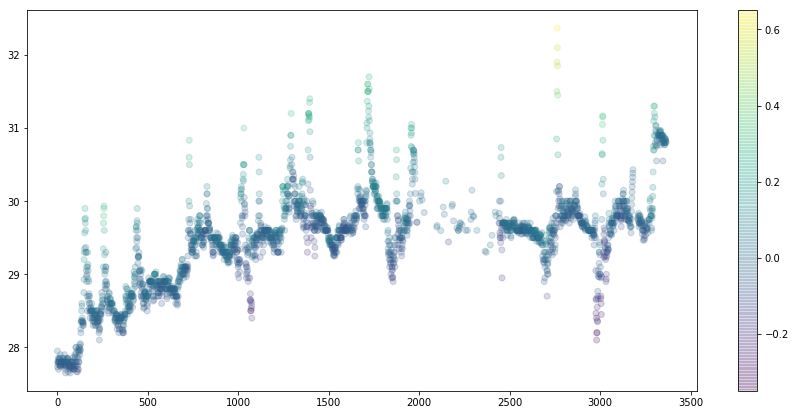

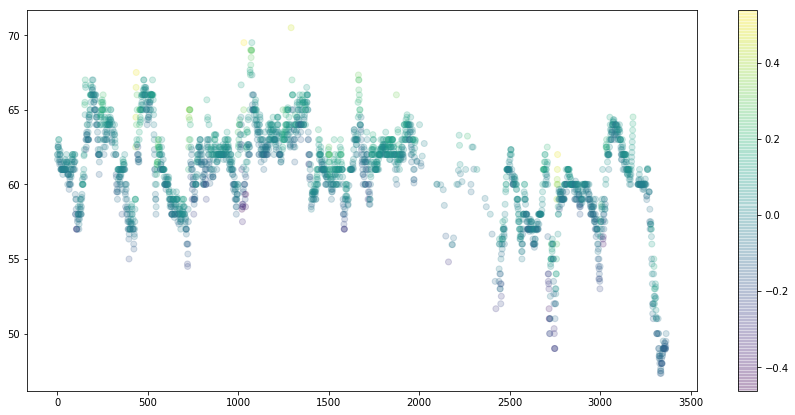

In [445]:
dfz['time'] = (dfz.index.astype(np.int64) - dfz.index.astype(np.int64).min())/300000000000
for g in range(1,5):
    plt.scatter(dfz.time,dfz['field'+str(g)],c=dfz['field'+str(g)+'_diff'], alpha=.2)
    plt.colorbar()
    plt.show()

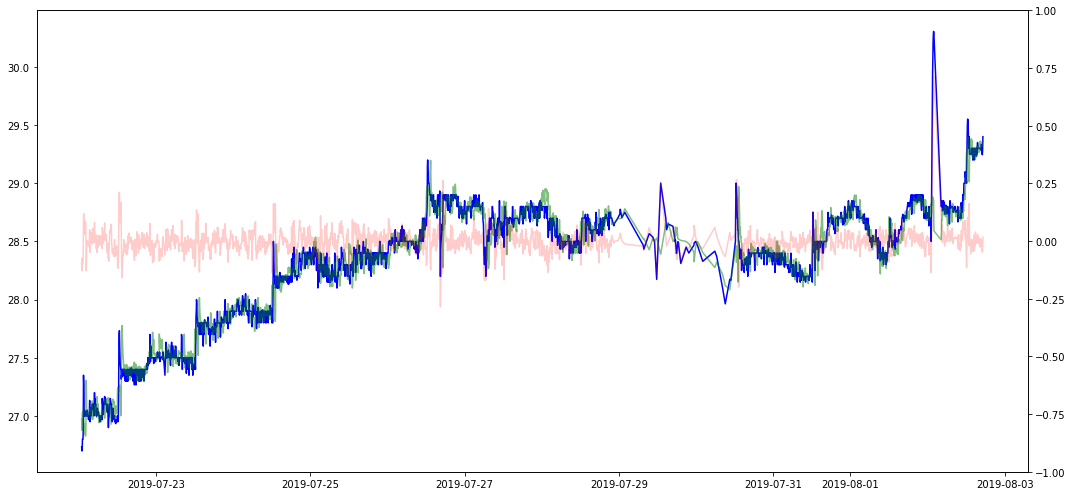

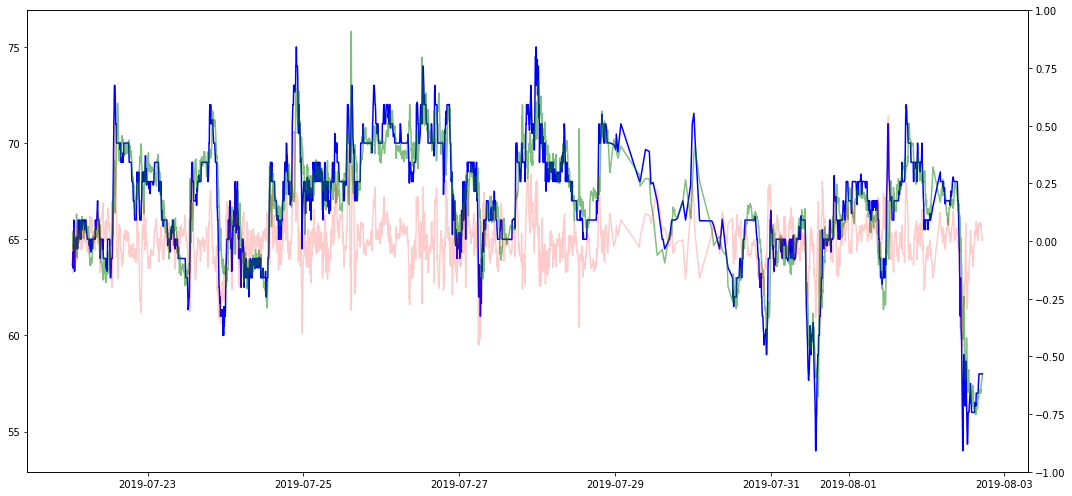

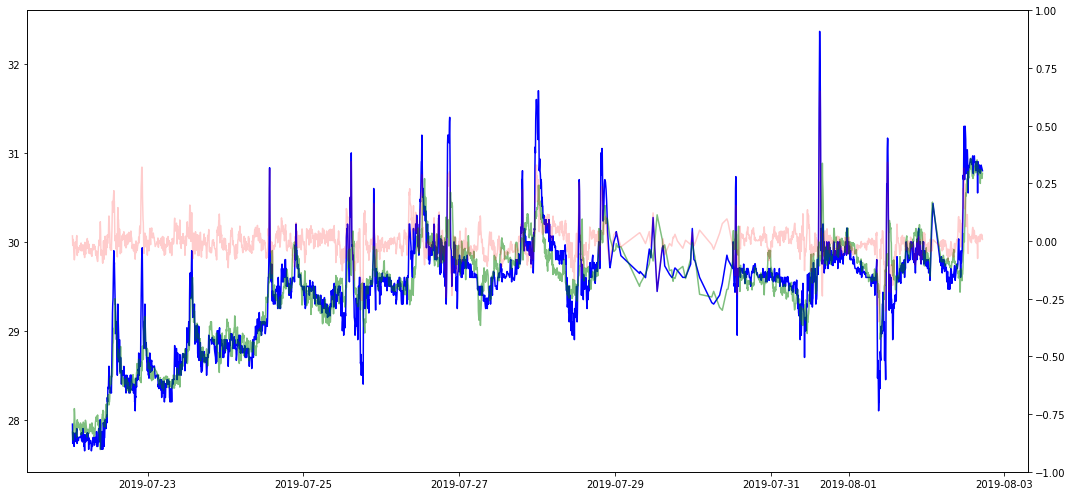

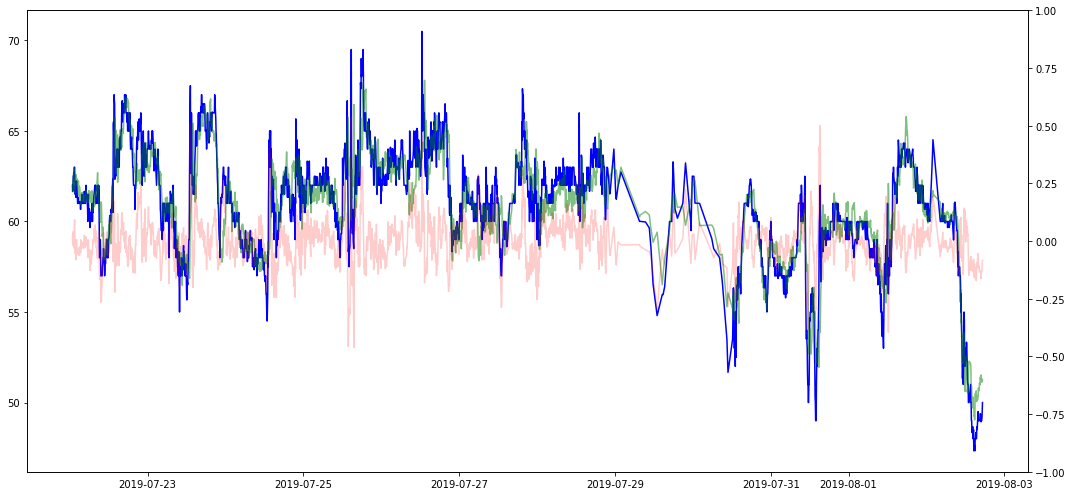

In [446]:
for g in range(1,5):
    fig, ax1 = plt.subplots()
    ax1.plot(dfz['field'+str(g)],c='b')
    ax1.plot(dfz['field'+str(g)+'_pred'],c='g',alpha=.5)
    ax2 = ax1.twinx()
    ax2.set_ylim(-1,1)
    ax2.plot(dfz['field'+str(g)+'_diff'],c='r',alpha=.2)
    fig.tight_layout() 
    plt.show()

In [474]:
dfz.head()

,field1,field1_pred,field2,field2_pred,field3,field3_pred,field4,field4_pred,field1_diff,field2_diff,field3_diff,field4_diff,time
created_at,,,,,,,,,,,,,
2019-07-22 00:50:00,26.733333,26.973562,63.666667,65.387437,27.950000,27.859754,62.000000,61.648672,-0.101513,-0.135227,0.022584,0.022785,0.0
2019-07-22 00:55:00,26.700000,26.875303,64.000000,65.205253,27.733333,27.808617,61.666667,61.947023,-0.074078,-0.094715,-0.018840,-0.018183,1.0
2019-07-22 01:00:00,26.700000,27.003633,64.333333,64.521383,27.800000,27.873853,62.000000,62.279343,-0.128306,-0.014778,-0.018482,-0.018117,2.0
2019-07-22 01:05:00,26.800000,27.033040,63.500000,65.239872,27.800000,27.770920,62.500000,61.857976,-0.098476,-0.136728,0.007277,0.041638,3.0
2019-07-22 01:10:00,26.800000,27.032885,65.000000,65.399668,27.850000,27.881095,62.500000,62.546512,-0.098410,-0.031408,-0.007782,-0.003017,4.0


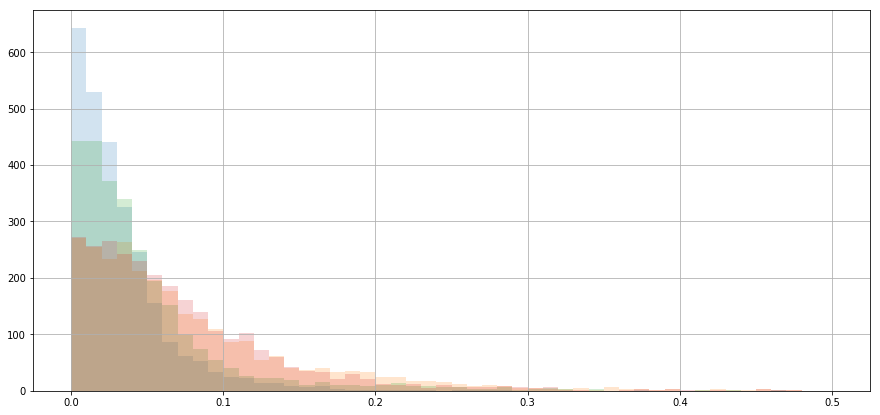

In [468]:
for g in range(1,5):
    dfz['field'+str(g)+'_diff'].apply(abs).hist(range=(0,.5),bins=50, alpha=.2)

In [473]:
[x for x in dfz.columns if 'field' in x]

['field1',
 'field1_pred',
 'field2',
 'field2_pred',
 'field3',
 'field3_pred',
 'field4',
 'field4_pred',
 'field1_diff',
 'field2_diff',
 'field3_diff',
 'field4_diff']